# Life history trade-offs: Antibiotic Resistance and Vaccination

## SIR Model without birth rate or death rate

#### followed closely after the tutorial from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

In [293]:
#imports

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

The simple SIR model we employ here is formulated using the following ODEs

$$
\begin{aligned}
\frac{dS}{dt} &= - \beta S I\\
\frac{dI}{dt} &= \beta S I - \gamma I\\
\frac{dR}{dt} &= \gamma I
\end{aligned}
$$

For this model we can calculate the equilibrium solutions, so setting the time derivative to zero

$$
\begin{aligned}
\frac{dS}{dt} &= - \beta S I \stackrel{!}{=} 0\\
\frac{dI}{dt} &= \beta S I - \gamma I \stackrel{!}{=} 0\\
\frac{dR}{dt} &= \gamma I \stackrel{!}{=} 0
\end{aligned}
$$

This gives two solutions:
* disease free solution (I = 0)
$$
\begin{aligned}
S_f &= C\\
I_f &= 0\\
R_f &= C
\end{aligned}
$$

* endemic solution (not done yet)
$$
\begin{aligned}
S_e &= \frac{\gamma}{\beta}\\
I_e &= 0\\
R_e &= C
\end{aligned}
$$


In [294]:
#initialising variables

#total population size
N = 1000 

#prior immune and recovered
I0, R0 = 1, 0

#prior susceptible
S0 = N - I0 - R0

#contact rate beta and recovery rate gamma
beta1, gamma1 = 1/N, 1./10

#initial grid
t = np.linspace(0, 160, 160)

In [295]:
#PRE: all variables are positive integers
#POST: The SIR model

def SIR (y, t, N, beta, gamma):
    S, I, R = y
    dSdt = - beta * S * I 
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I

    return dSdt, dIdt, dRdt


### Solving the ODE system

In [296]:
#initial vector
y0 = S0, I0, R0

#numerically integrate the ODEs
sol = odeint(SIR, y0, t, args=(N, beta1, gamma1))
S1, I1, R1 = sol.T

### Plotting the Result

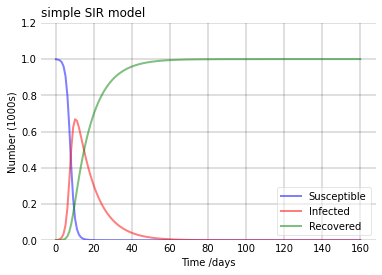

In [322]:
#plot
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S1/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I1/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R1/1000, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('simple SIR model', loc='left')
plt.show()

## SIR model with death rates and birth rates

The SIR model using birth and death rates we employ here is formulated using the following ODEs. This model was introduced in the infectious disease dynamics script at ETH

$$
\begin{aligned}
\frac{dS}{dt} &= \Lambda - \delta_S S - \beta S I\\
\frac{dI}{dt} &= \beta S I - \delta_I I - \gamma I\\
\frac{dR}{dt} &= \gamma I - \delta_R R
\end{aligned}
$$

For this case we can calculate the equilibrium solutions so where the time derivative equals zero

$$
\begin{aligned}
\frac{dS}{dt} &= \Lambda - \delta_S S - \beta S I \stackrel{!}{=} 0\\
\frac{dI}{dt} &= \beta S I - \delta_I I - \gamma I \stackrel{!}{=} 0\\
\frac{dR}{dt} &= \gamma I - \delta_R R \stackrel{!}{=} 0
\end{aligned}
$$

This gives two solutions
* disease free solution (I = 0)
$$
\begin{aligned}
S_f &= \frac{\Lambda}{\delta_S}\\
I_f &= 0\\
R_f &= 0
\end{aligned}
$$

* endemic solution
$$
\begin{aligned}
S_e &= \frac{\delta_I + \gamma}{\beta}\\
I_e &= \frac{\Lambda}{\delta_I + \gamma} - \frac{\delta_S}{\beta}\\
R_e &= \frac{\gamma}{\delta_R}\left(\frac{\Lambda}{\delta_I+\gamma}-\frac{\delta_S}{\beta}\right)
\end{aligned}
$$

In [310]:
#adding birth and death rates to the simple SIR model

#parameters given above
beta2 = 1/N
gamma2 = 0.1

#parameters to be added
Lambda = 0.5
deltaS = 0.01
deltaI = 0.1
deltaR = 0.01

In [311]:
#PRE: all variables are positive integers
#POST: The SIR model with death rates

def SIRcomplex (y, t, N, beta, gamma, Lambda, deltaS, deltaI, deltaR):
    S, I, R = y
    dSdt = Lambda - deltaS * S - beta * S * I
    dIdt = beta * S * I  - deltaI * I - gamma * I
    dRdt = gamma * I - deltaR * R

    return dSdt, dIdt, dRdt


### Solving the ODE system

In [312]:
#numerically integrate the ODEs
sol = odeint(SIRcomplex, y0, t, args=(N, beta2, gamma2, Lambda, deltaS, deltaI, deltaR))
S2, I2, R2 = sol.T

### Plotting the results

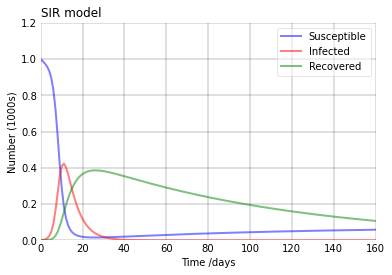

In [323]:
#plot
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S2/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I2/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R2/1000, 'g', alpha=0.5, lw=2, label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.set_xlim(0, 160)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='k', lw=0.25, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title('SIR model', loc='left')
plt.show()

## SIR model modelling antibiotic resistance

In order to model the trade-offs of transimissability and virulence, we first have to develop a model of antibiotic resistance. We do this with a SIS model. The reasoning behind choosing an SIS model is that we neglect immunity and births, since we believe that in the long term these two forces will cancel out so we make the simplifying assumption that we don't explicitly model it. 